# Loading the Dataset #

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/yash9939/Crop_Recomendation_System/refs/heads/main/Dataset/Crop%20recommendation%20dataset.csv")

df.head()

,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
0,rice,cereals,Alluvial soil,kharif,Jun,Sep,irrigated,7.6,8.0,116.9,...,2462.3,2500,73.8,80,82.4,100,40.7,60,42.2,60
1,rice,cereals,Loamy soil,kharif,Jul,Oct,rainfed,6.2,8.0,117.9,...,1237.5,2500,60.9,80,90.5,100,51.3,60,46.2,60
2,rice,cereals,Clay soil,kharif,Jun,Sep,irrigated,6.7,8.0,117.7,...,1075.1,2500,67.5,80,86.2,100,50.7,60,44.4,60
3,rice,cereals,Alluvial soil,kharif,Jul,Oct,rainfed,6.1,8.0,149.8,...,1549.9,2500,73.6,80,91.3,100,51.3,60,44.5,60
4,rice,cereals,Loamy soil,kharif,Jun,Sep,irrigated,8.0,8.0,131.7,...,1306.4,2500,60.3,80,81.3,100,48.6,60,51.0,60


In [60]:
df = df.sample(frac=1)


In [61]:
df.head()

,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
53413,tapoica,Root&tuber,red lateritic Loamy soil,rabi,Dec,Jun,rainfed,5.9,7.0,292.7,...,1000.0,1000,56.7,60,75.4,100,48.0,60,51.4,60
25673,sugarbeet,sugar crops,sandy Loamy soil,kharif,Jul,Oct,irrigated,7.4,8.0,170.1,...,656.2,800,68.0,80,138.9,150,79.0,80,67.8,80
48947,annual moringa,vegetables,sandy Loamy soil,Zaid,May,May,rainfed,6.5,8.0,216.0,...,1145.8,1200,75.5,85,115.7,120,47.5,60,41.9,60
36265,bottle gourd,vegetables,sandy Loamy soil,Zaid,Mar,Mar,rainfed,6.3,6.7,120.0,...,1018.3,1200,75.1,85,78.9,100,46.8,80,86.0,100
33975,pumpkin,vegetables,Laterite soil,Zaid,Mar,Mar,rainfed,6.1,7.0,118.6,...,951.4,1200,65.2,70,82.6,100,68.6,80,76.9,100


In [62]:
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}")

Number of Rows: 57000
Number of Columns: 23


In [63]:
def details(data):
    features = []
    count = []
    duplicates = []
    missing  = []
    modes = []
    duplicate_percentage = []
    missing_percentage = []
    dtype = []
    for i in data.columns:
        features.append(i)
        count.append(data[i].count())
        duplicates.append(data.duplicated(subset=[i]).sum())
        missing.append(data[i].isnull().sum())
        modes.append(data[i].mode()[0])
        duplicate_percentage.append(f"{(data.duplicated(subset=[i]).sum())/data.shape[0]*100:.2f} %")
        missing_percentage.append(f"{(data[i].isnull().sum())/data.shape[0]*100:.2f} %")
        dtype.append(data[i].dtype)

    dataFrame = pd.DataFrame({'Features/Columns' : features,
                              'Count' : count,
                              'Missing' : missing,
                              'Duplicates' : duplicates,
                              'Mode' : modes,
                              'Duplicate Percentage' : duplicate_percentage,
                              'Missing Percentage' : missing_percentage,
                              'Data Type' : dtype})
    return dataFrame

In [64]:
details(df)

,Features/Columns,Count,Missing,Duplicates,Mode,Duplicate Percentage,Missing Percentage,Data Type
0,CROPS,57000,0,56943,Cabbage,99.90 %,0.00 %,object
1,TYPE_OF_CROP,57000,0,56990,vegetables,99.98 %,0.00 %,object
2,SOIL,57000,0,56966,sandy Loamy soil,99.94 %,0.00 %,object
3,SEASON,57000,0,56997,Zaid,99.99 %,0.00 %,object
4,SOWN,57000,0,56992,Jul,99.99 %,0.00 %,object
5,HARVESTED,57000,0,56993,Apr,99.99 %,0.00 %,object
6,WATER_SOURCE,57000,0,56998,irrigated,100.00 %,0.00 %,object
7,SOIL_PH,57000,0,56959,6.6,99.93 %,0.00 %,float64
8,SOIL_PH_HIGH,57000,0,56989,7.0,99.98 %,0.00 %,float64
9,CROPDURATION,57000,0,54731,120.0,96.02 %,0.00 %,float64


In [65]:
df.describe()

,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,CROPDURATION_MAX,TEMP,MAX_TEMP,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000
mean,6.624367,7.245614,109.347488,117.736842,24.757740,30.385965,887.262882,1038.596491,71.197588,76.421053,81.284277,98.947368,48.197891,60.526316,56.605086,69.122807
std,0.649972,0.609310,52.931444,54.934103,5.862506,6.354373,356.326523,438.103562,23.158554,23.860877,33.786202,37.542549,17.160902,19.414494,27.438288,30.681465
min,5.000000,6.000000,21.000000,21.000000,5.000000,18.000000,330.000000,350.000000,15.000000,18.000000,20.000000,40.000000,20.000000,30.000000,20.000000,30.000000
25%,6.200000,6.800000,75.900000,90.000000,21.100000,27.000000,604.600000,750.000000,64.400000,70.000000,56.600000,80.000000,34.975000,40.000000,34.900000,40.000000
50%,6.600000,7.000000,99.900000,105.000000,24.800000,30.000000,929.500000,1000.000000,78.200000,85.000000,80.500000,100.000000,47.700000,60.000000,50.500000,60.000000
75%,7.000000,7.500000,120.500000,140.000000,28.000000,35.000000,1070.100000,1200.000000,85.300000,90.000000,100.800000,120.000000,58.000000,80.000000,75.400000,100.000000
max,9.000000,9.000000,330.000000,330.000000,47.000000,47.000000,2499.800000,2500.000000,100.000000,100.000000,199.900000,200.000000,100.000000,100.000000,149.900000,150.000000


In [66]:
for col in df.select_dtypes(include='object').columns:
  print(f"{col} : {df[col].nunique()}\n{df[col].unique()}\n")

CROPS : 57
['tapoica' 'sugarbeet' 'annual moringa' 'bottle gourd' 'pumpkin' 'thinai'
 'cowpea' 'elephant foot yam' 'jute' 'soyabean' 'sorghum' 'brinjal'
 'tinda' 'panivaragu' 'cucumber' 'wheat' 'vegetable cowpea' 'french bean'
 'radish' 'groundnut' 'gingely' 'chowchow' 'rice' 'capsicum'
 'Pearl millet' 'sweet potato' 'blackgram' 'maize' 'bitter gourd' 'onion'
 'samai' 'muskmelon' 'cauliflower' 'ribbed gourd' 'carrot' 'small onion'
 'ragi' 'bhendi' 'ash gourd' 'cotton' 'peas' 'sugarcane' 'horsegram'
 'watermelon' 'Cabbage' 'kudiraivali' 'bengalgram' 'greengram' 'redgram'
 'tomato' 'varagu' 'chillies' 'castor' 'sunflower' 'snake gourd'
 'beetroot' 'cluster bean']

TYPE_OF_CROP : 10
['Root&tuber' 'sugar crops' 'vegetables' 'millets' 'pulses' 'fibre crop'
 'cereals' 'oil seeds' 'colecrops' 'bulbvegetables']

SOIL : 34
['red lateritic Loamy soil' 'sandy Loamy soil' 'Laterite soil'
 'Loamy soil' 'Sandy soil\xa0' 'rich red Loamy soil' 'clay Loamy soil'
 'well-drained soil' 'loamy\xa0soil' 'we

In [67]:
def strip_data(data):
  for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip()
  return data

In [68]:
df = strip_data(df)

In [69]:
mapping = {
    "colecrops":"cole crops",
    "Root&tuber":"Tuberous root",
    "bulbvegetables":"bulb vegetables"
}

df.TYPE_OF_CROP = df.TYPE_OF_CROP.replace(mapping)
df.TYPE_OF_CROP.unique()

array(['Tuberous root', 'sugar crops', 'vegetables', 'millets', 'pulses',
       'fibre crop', 'cereals', 'oil seeds', 'cole crops',
       'bulb vegetables'], dtype=object)

In [70]:
def correct_soil(s):
  if "\xa0" in s:
    s = s.replace("\xa0","")
  return s

In [71]:
df.SOIL = df.SOIL.apply(lambda x: correct_soil(x))
df.SOIL.unique()

array(['red lateritic Loamy soil', 'sandy Loamy soil', 'Laterite soil',
       'Loamy soil', 'Sandy soil', 'rich red Loamy soil',
       'clay Loamy soil', 'well-drained soil', 'loamysoil',
       'well-drained loamysoil', 'well-grained deep loamy moist soil',
       'Sandysoil', 'Red soil', 'Alluvial soil', 'cottonsoil',
       'black cotton soil', 'red Loamy soil', 'heavy soil', 'light soi',
       'heavy Black Soil', 'Clay soil', 'Black Soil', 'medium Black Soil',
       'light Loamy soil', 'silty Loamy soil', 'shallow Black Soil',
       'sandy loamysoil', 'sandy clay Loamy soil', 'deep soil',
       'brown Loamy soil', 'friable soil', 'salty clay Loamy soil'],
      dtype=object)

In [72]:
mapping = {
    "Sandysoil":"Sandy Soil",
    "loamysoil":"loamy soil",
    "light soi":"light soil",
    "well-drained loamysoil":"well-drained loamy soil",
    "cottonsoil":"cotton soil",
    "sandy loamysoil":"sandy loamy soil"
}

df.SOIL = df.SOIL.replace(mapping)
df.SOIL.unique()

array(['red lateritic Loamy soil', 'sandy Loamy soil', 'Laterite soil',
       'Loamy soil', 'Sandy soil', 'rich red Loamy soil',
       'clay Loamy soil', 'well-drained soil', 'loamy soil',
       'well-drained loamy soil', 'well-grained deep loamy moist soil',
       'Sandy Soil', 'Red soil', 'Alluvial soil', 'cotton soil',
       'black cotton soil', 'red Loamy soil', 'heavy soil', 'light soil',
       'heavy Black Soil', 'Clay soil', 'Black Soil', 'medium Black Soil',
       'light Loamy soil', 'silty Loamy soil', 'shallow Black Soil',
       'sandy loamy soil', 'sandy clay Loamy soil', 'deep soil',
       'brown Loamy soil', 'friable soil', 'salty clay Loamy soil'],
      dtype=object)

In [73]:
def capitalize(data):
  for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.capitalize()
  return data

df = capitalize(df)

for col in df.select_dtypes(include='object').columns:
  print(f"{col} : {df[col].nunique()}\n{df[col].unique()}\n")

CROPS : 57
['Tapoica' 'Sugarbeet' 'Annual moringa' 'Bottle gourd' 'Pumpkin' 'Thinai'
 'Cowpea' 'Elephant foot yam' 'Jute' 'Soyabean' 'Sorghum' 'Brinjal'
 'Tinda' 'Panivaragu' 'Cucumber' 'Wheat' 'Vegetable cowpea' 'French bean'
 'Radish' 'Groundnut' 'Gingely' 'Chowchow' 'Rice' 'Capsicum'
 'Pearl millet' 'Sweet potato' 'Blackgram' 'Maize' 'Bitter gourd' 'Onion'
 'Samai' 'Muskmelon' 'Cauliflower' 'Ribbed gourd' 'Carrot' 'Small onion'
 'Ragi' 'Bhendi' 'Ash gourd' 'Cotton' 'Peas' 'Sugarcane' 'Horsegram'
 'Watermelon' 'Cabbage' 'Kudiraivali' 'Bengalgram' 'Greengram' 'Redgram'
 'Tomato' 'Varagu' 'Chillies' 'Castor' 'Sunflower' 'Snake gourd'
 'Beetroot' 'Cluster bean']

TYPE_OF_CROP : 10
['Tuberous root' 'Sugar crops' 'Vegetables' 'Millets' 'Pulses'
 'Fibre crop' 'Cereals' 'Oil seeds' 'Cole crops' 'Bulb vegetables']

SOIL : 29
['Red lateritic loamy soil' 'Sandy loamy soil' 'Laterite soil'
 'Loamy soil' 'Sandy soil' 'Rich red loamy soil' 'Clay loamy soil'
 'Well-drained soil' 'Well-drained loam

In [74]:
df

,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
53413,Tapoica,Tuberous root,Red lateritic loamy soil,Rabi,Dec,Jun,Rainfed,5.9,7.0,292.7,...,1000.0,1000,56.7,60,75.4,100,48.0,60,51.4,60
25673,Sugarbeet,Sugar crops,Sandy loamy soil,Kharif,Jul,Oct,Irrigated,7.4,8.0,170.1,...,656.2,800,68.0,80,138.9,150,79.0,80,67.8,80
48947,Annual moringa,Vegetables,Sandy loamy soil,Zaid,May,May,Rainfed,6.5,8.0,216.0,...,1145.8,1200,75.5,85,115.7,120,47.5,60,41.9,60
36265,Bottle gourd,Vegetables,Sandy loamy soil,Zaid,Mar,Mar,Rainfed,6.3,6.7,120.0,...,1018.3,1200,75.1,85,78.9,100,46.8,80,86.0,100
33975,Pumpkin,Vegetables,Laterite soil,Zaid,Mar,Mar,Rainfed,6.1,7.0,118.6,...,951.4,1200,65.2,70,82.6,100,68.6,80,76.9,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55247,Cauliflower,Cole crops,Sandy loamy soil,Rabi,Nov,May,Rainfed,6.7,6.8,85.8,...,490.1,500,97.9,100,84.1,120,59.1,60,49.4,60
15674,Horsegram,Pulses,Light soil,Rabi,Dec,Jun,Rainfed,6.9,7.5,102.9,...,800.0,800,73.1,80,47.9,60,33.1,40,38.4,40
36287,Bottle gourd,Vegetables,Sandy loamy soil,Zaid,May,May,Rainfed,6.4,6.7,120.0,...,1077.8,1200,82.9,85,68.6,100,73.6,80,71.2,100
24214,Sugarcane,Sugar crops,Red loamy soil,Kharif,Jun,Sep,Irrigated,6.8,8.0,319.2,...,2090.9,2500,71.5,80,152.1,200,60.7,100,129.9,150


In [75]:
df.to_csv("cleaned_dataset.csv", index=False)

# EDA

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\3069587735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df.SOIL, order = df.SOIL.value_counts().index, palette="bright", alpha=0.8)


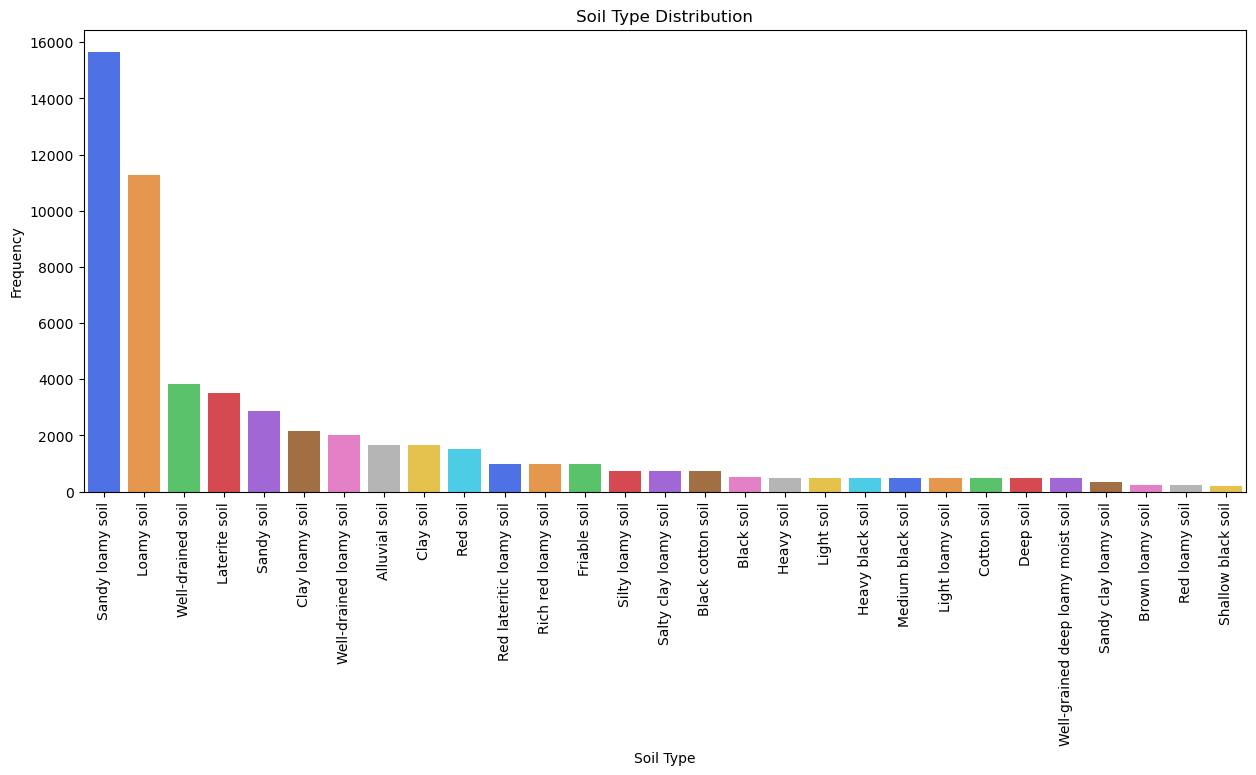

In [76]:
plt.figure(figsize=(15,6))
sns.countplot(x = df.SOIL, order = df.SOIL.value_counts().index, palette="bright", alpha=0.8)
plt.xticks(rotation=90)
plt.title("Soil Type Distribution")
plt.xlabel("Soil Type")
plt.ylabel("Frequency")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\1250837546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_crop_duration.index, y=avg_crop_duration.values, palette="bright")


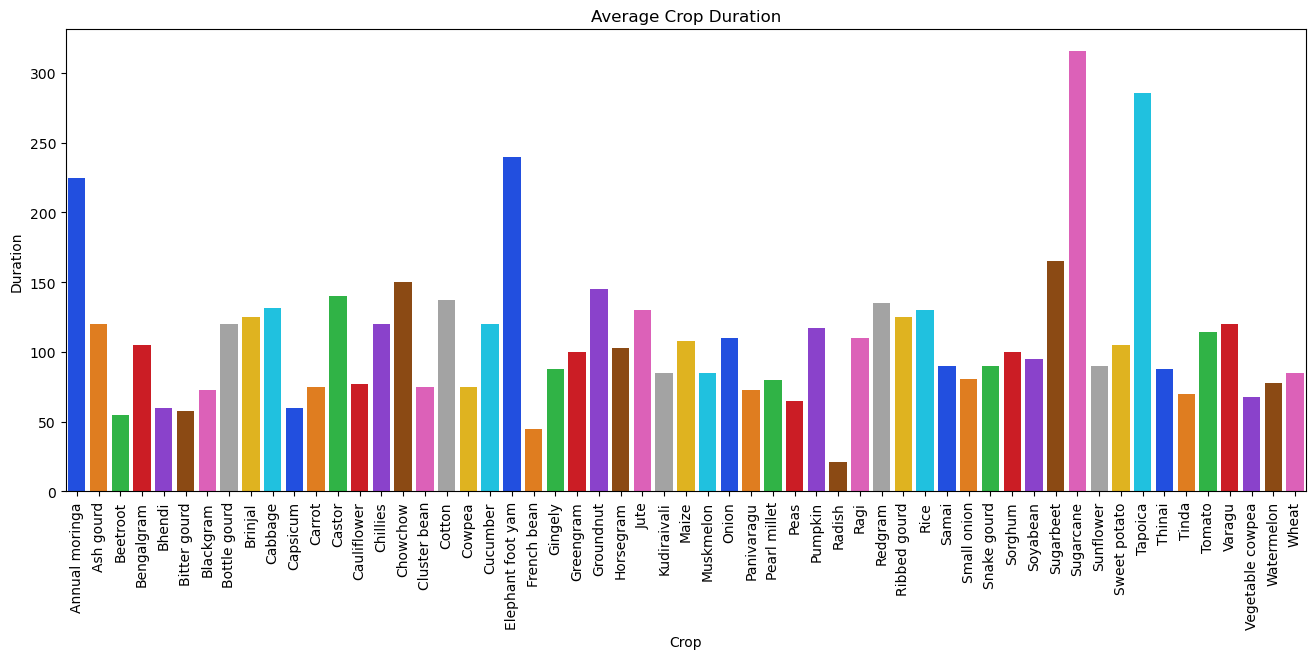

In [77]:
avg_crop_duration = df.groupby("CROPS")["CROPDURATION"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_crop_duration.index, y=avg_crop_duration.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Crop Duration")
plt.xlabel("Crop")
plt.ylabel("Duration")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\4128388300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temp.index, y=avg_temp.values, palette="bright")


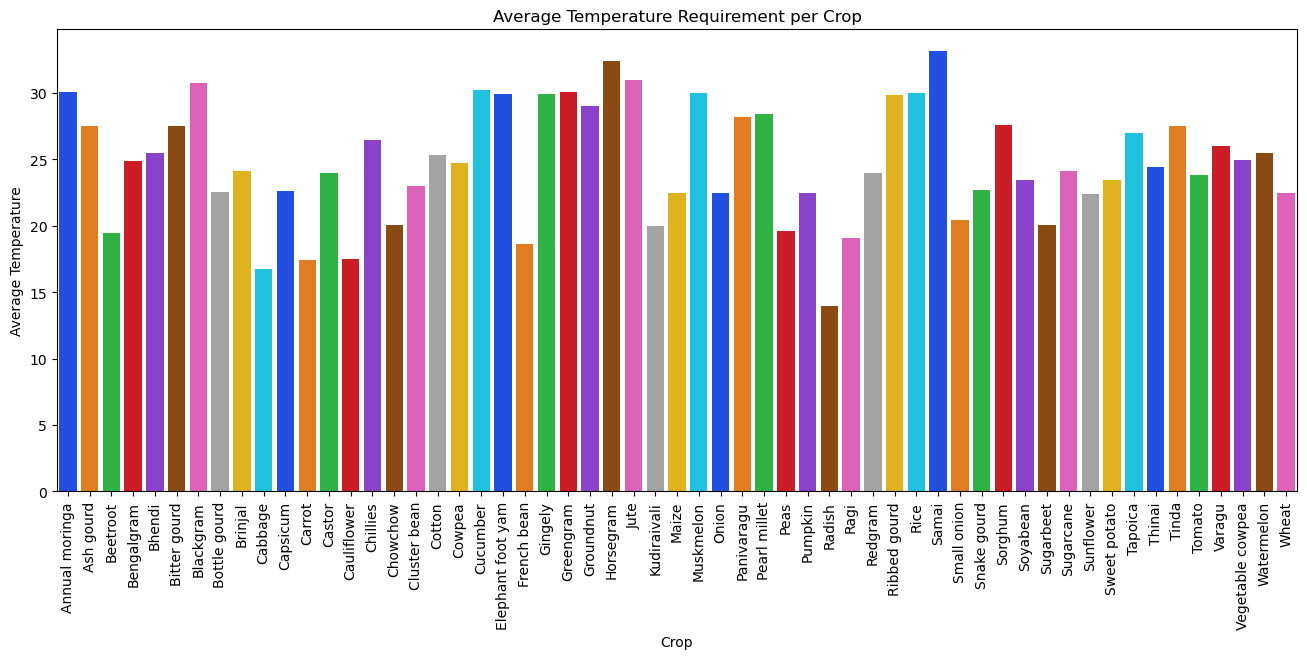

In [78]:
avg_temp = df.groupby("CROPS")["TEMP"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_temp.index, y=avg_temp.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Temperature Requirement per Crop")
plt.ylabel("Average Temperature")
plt.xlabel("Crop")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\3303809605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_N.index, y=avg_N.values, palette="bright")


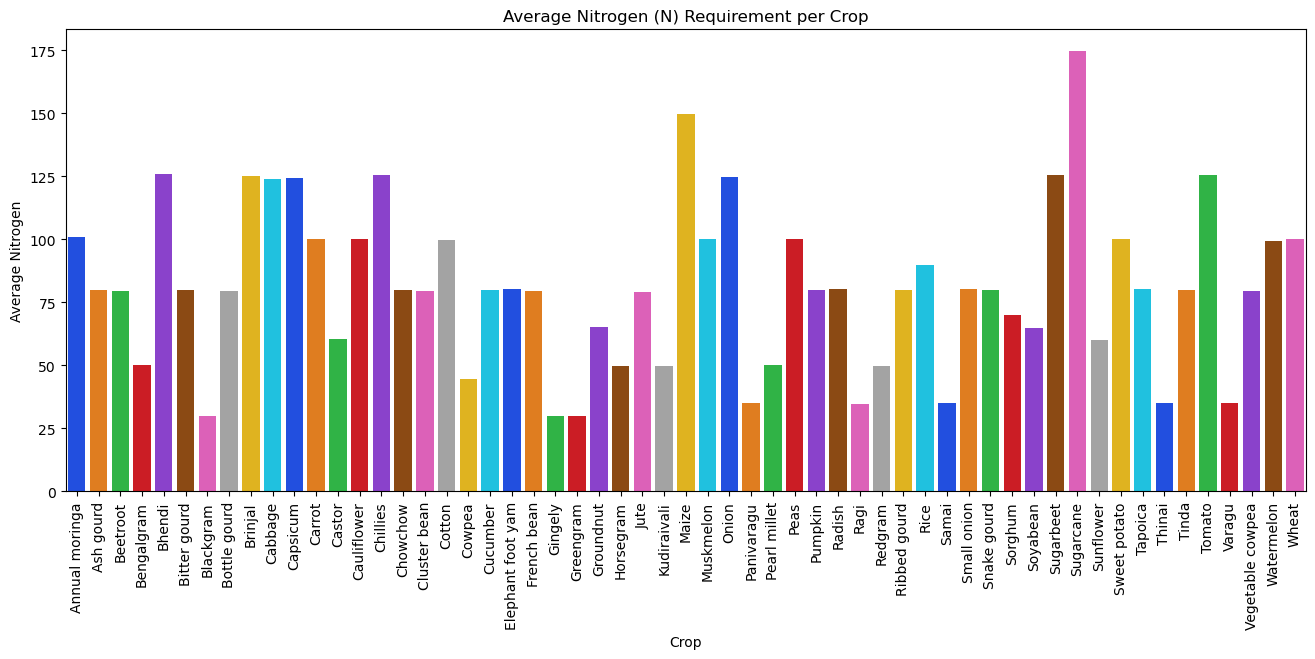

In [79]:
avg_N = df.groupby("CROPS")["N"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_N.index, y=avg_N.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Nitrogen (N) Requirement per Crop")
plt.ylabel("Average Nitrogen")
plt.xlabel("Crop")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\2643632108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.WATER_SOURCE, order=df.WATER_SOURCE.value_counts().index, palette="bright")


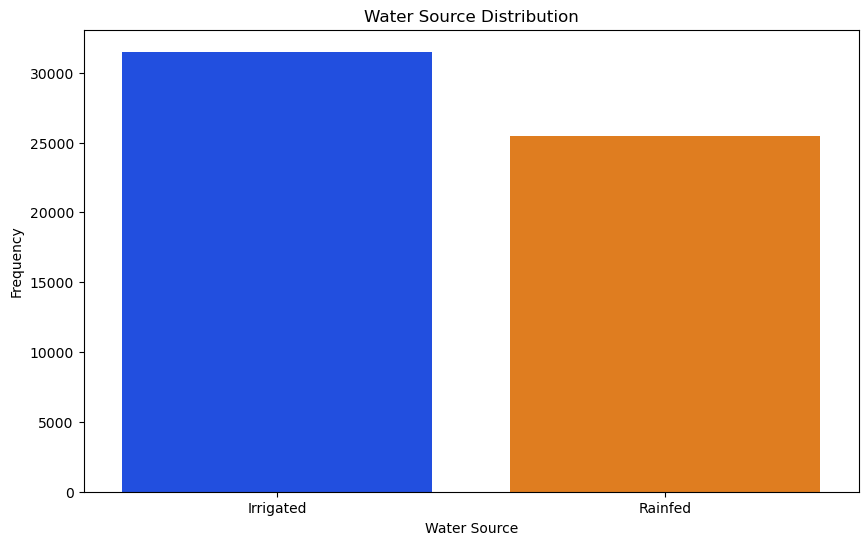

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.WATER_SOURCE, order=df.WATER_SOURCE.value_counts().index, palette="bright")
plt.title("Water Source Distribution")
plt.xlabel("Water Source")
plt.ylabel("Frequency")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\426333410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_K.index, y=avg_K.values, palette="bright")


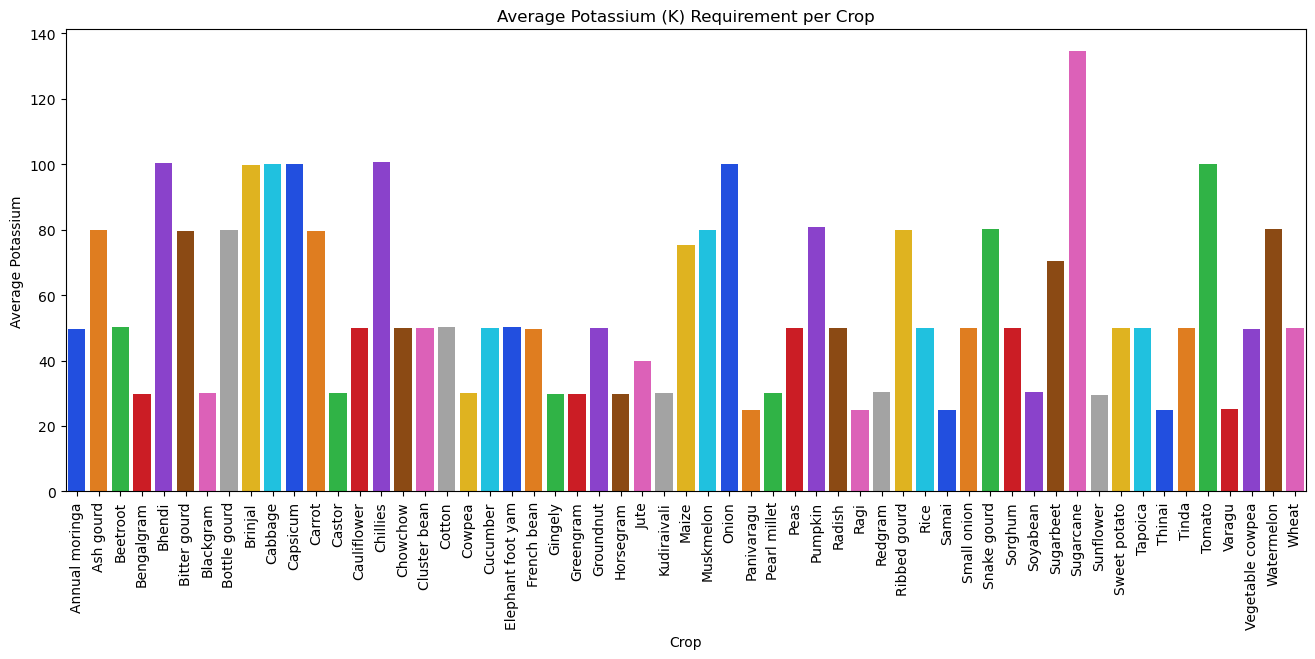

In [81]:
avg_K = df.groupby("CROPS")["K"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_K.index, y=avg_K.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Potassium (K) Requirement per Crop")
plt.ylabel("Average Potassium")
plt.xlabel("Crop")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\3020903285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_P.index, y=avg_P.values, palette="bright")


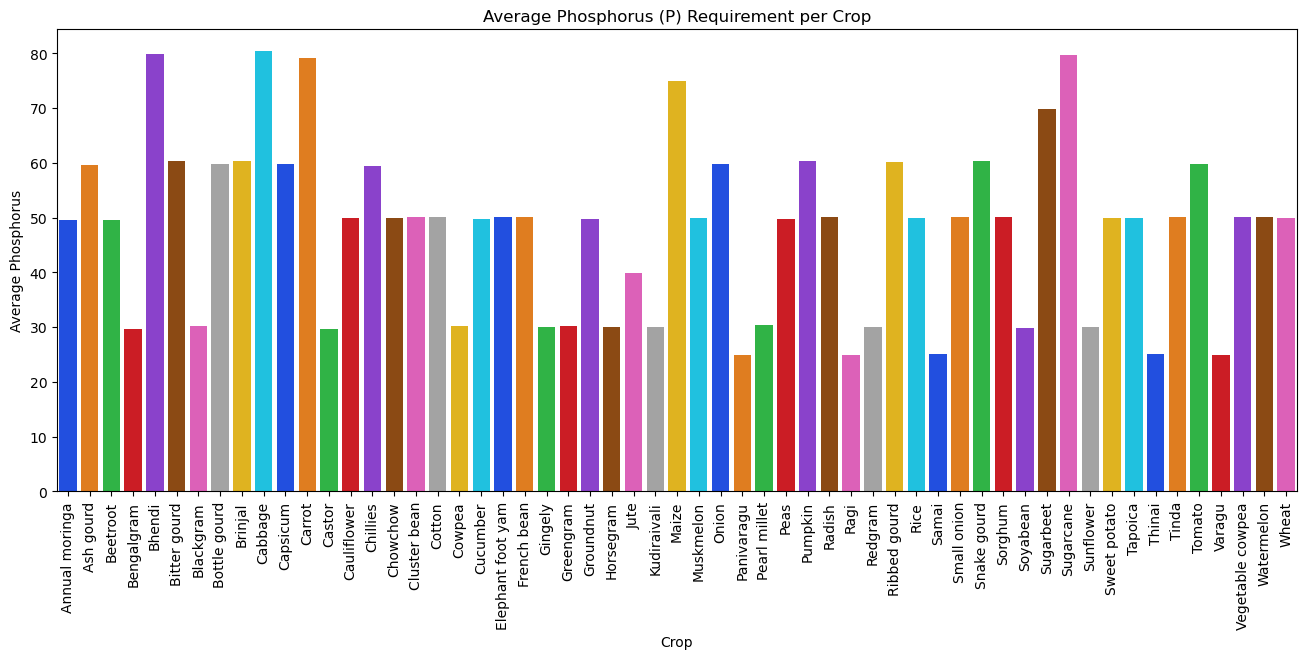

In [82]:
avg_P = df.groupby("CROPS")["P"].mean()

plt.figure(figsize=(16,6))
sns.barplot(x=avg_P.index, y=avg_P.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Phosphorus (P) Requirement per Crop")
plt.ylabel("Average Phosphorus")
plt.xlabel("Crop")
plt.show()

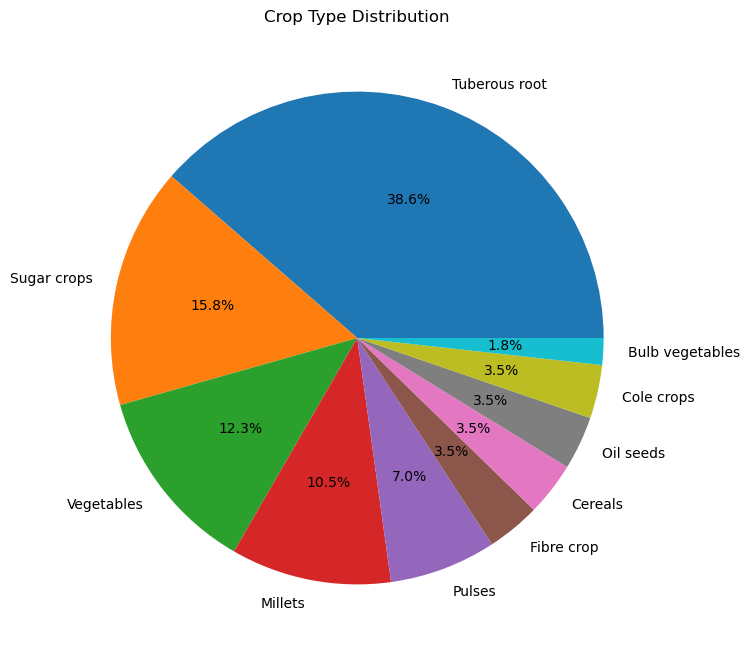

In [83]:
plt.figure(figsize=(10,8))
plt.pie(df.TYPE_OF_CROP.value_counts(), labels=df.TYPE_OF_CROP.unique(), autopct="%1.1f%%", startangle=0)
plt.title("Crop Type Distribution")
plt.show()

C:\Users\Aditya\AppData\Local\Temp\ipykernel_15752\549754647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_water.index, y=avg_water.values, palette="bright")


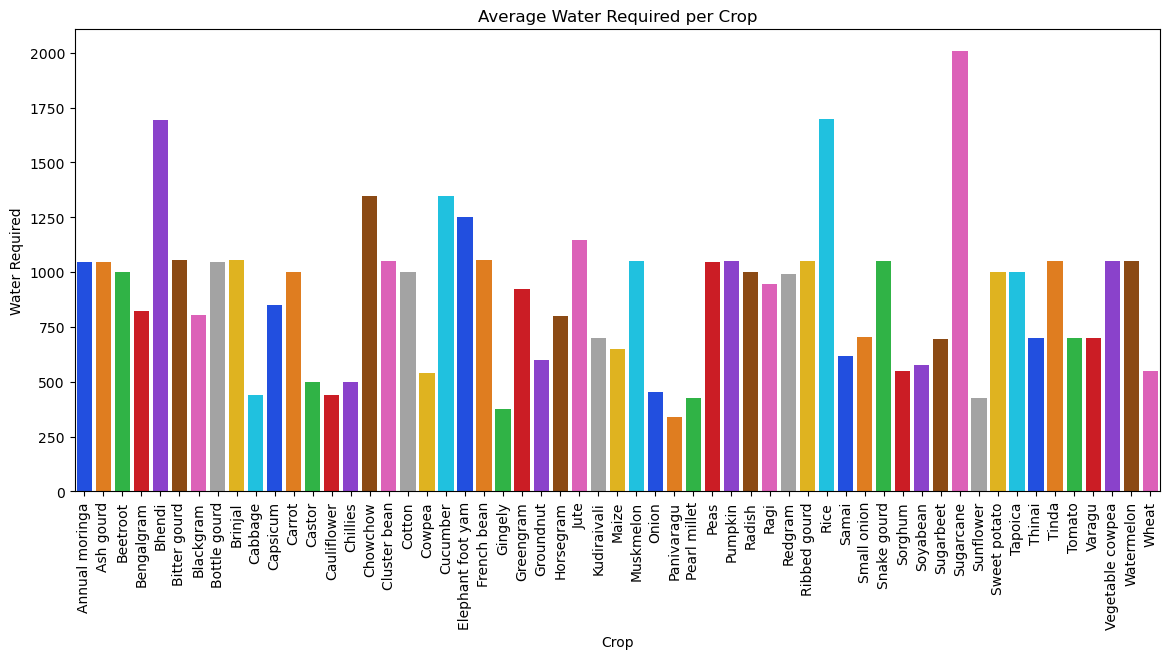

In [84]:
avg_water = df.groupby("CROPS")["WATERREQUIRED"].mean()

plt.figure(figsize=(14,6))
sns.barplot(x=avg_water.index, y=avg_water.values, palette="bright")
plt.xticks(rotation=90)
plt.title("Average Water Required per Crop")
plt.ylabel("Water Required")
plt.xlabel("Crop")
plt.show()

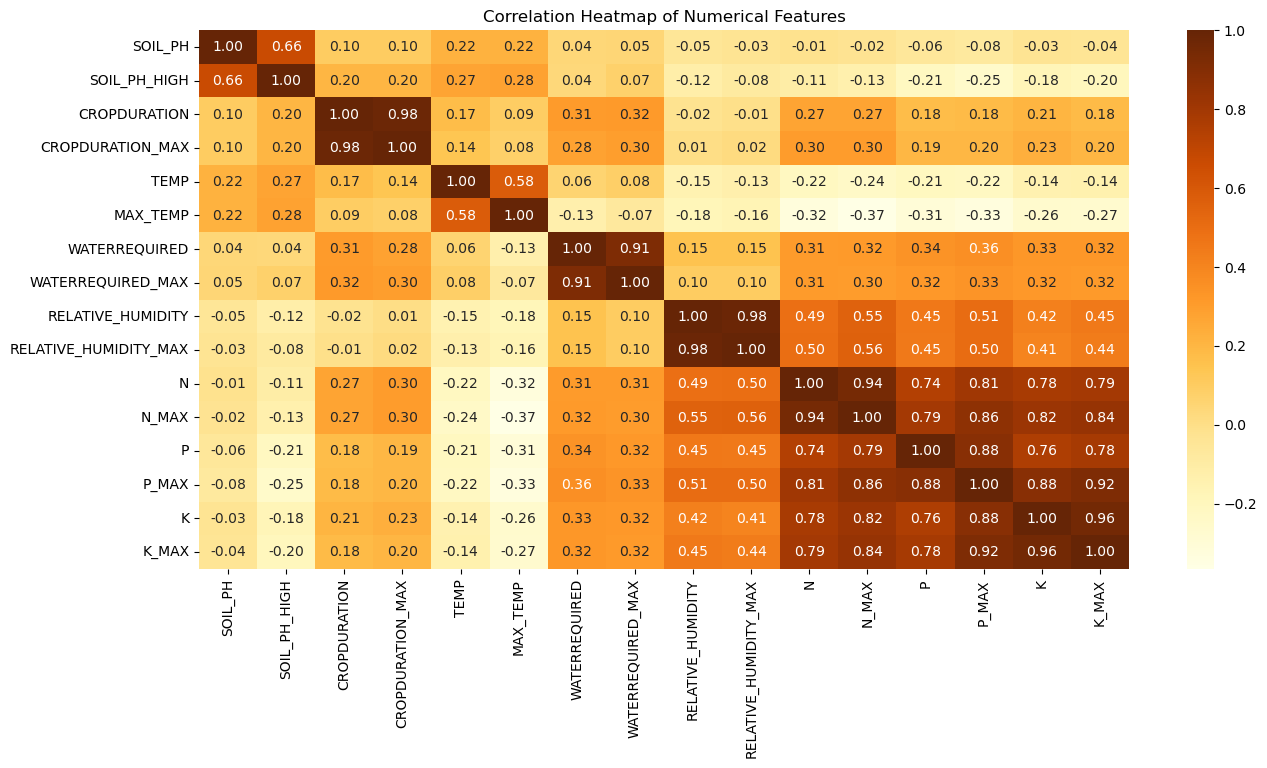

In [85]:
num_cols = []
for col in df.select_dtypes(include=["int64","float64"]).columns:
  num_cols.append(col)

plt.figure(figsize=(15,7))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="YlOrBr")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [87]:
from scipy.stats import skew, kurtosis

In [88]:
for col in num_cols:
        sk = skew(df[col].dropna())
        ku = kurtosis(df[col].dropna())
        print(f"{col:<25} {sk:>10.2f} {ku:>10.2f}")

SOIL_PH                         0.66       0.99
SOIL_PH_HIGH                    0.50       0.13
CROPDURATION                    1.93       4.65
CROPDURATION_MAX                1.84       4.31
TEMP                            0.19       0.76
MAX_TEMP                        0.68       0.16
WATERREQUIRED                   1.05       2.44
WATERREQUIRED_MAX               1.31       2.80
RELATIVE_HUMIDITY              -1.31       0.84
RELATIVE_HUMIDITY_MAX          -1.48       1.13
N                               0.48       0.05
N_MAX                           0.23      -0.22
P                               0.44      -0.18
P_MAX                           0.27      -0.69
K                               0.82      -0.02
K_MAX                           0.67      -0.65


N                           0.482        0.054 ❌ NOT NEEDED (Symmetric)
P                           0.439       -0.176 ❌ NOT NEEDED (Symmetric)
K                           0.818       -0.021 ⚠️ HELPFUL (Moderate)
WATERREQUIRED               1.050        2.444 ✅ YES (Highly skewed)
--------------------------------------------------------------------------------

📈 Creating distribution plots...
✓ Saved visualization to: skewness_analysis.png


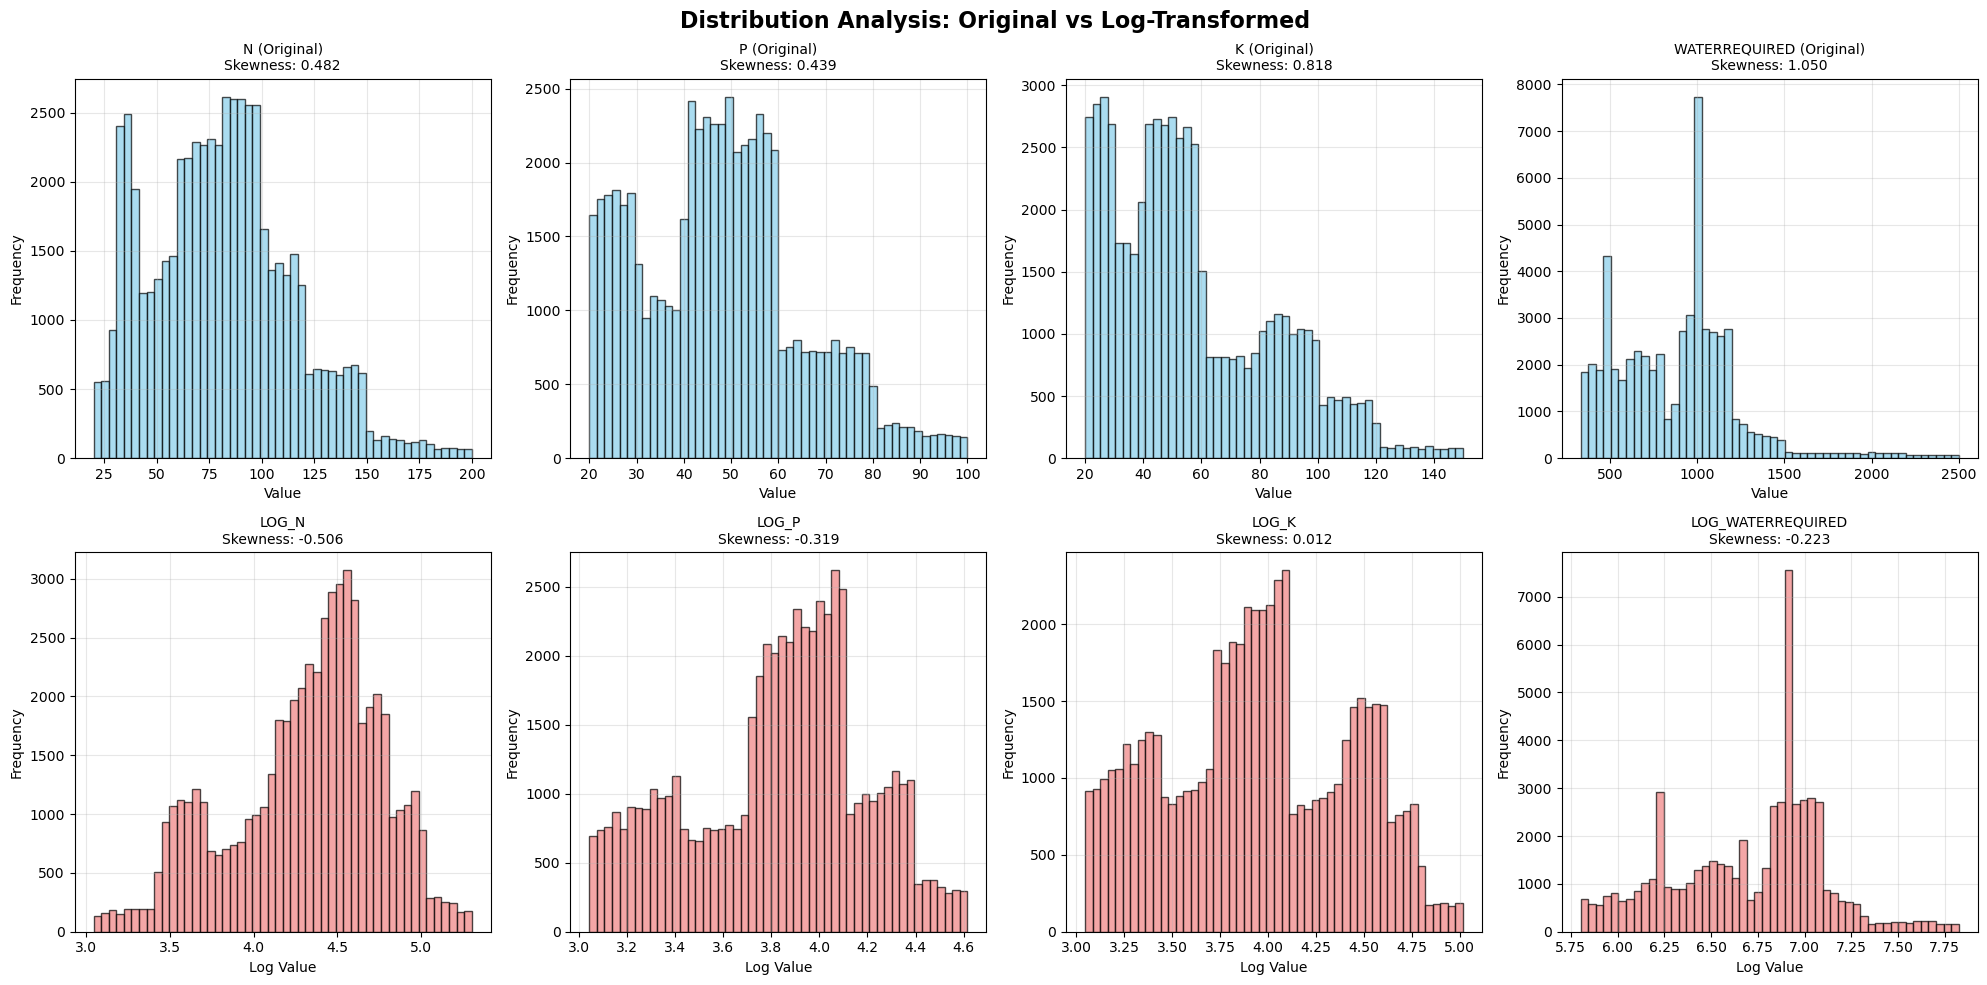

In [91]:
log_features = ['N', 'P', 'K', 'WATERREQUIRED']
skewness_results = {}

for feature in log_features:
    if feature in df.columns:
        # Calculate skewness and kurtosis
        sk = skew(df[feature].dropna())
        ku = kurtosis(df[feature].dropna())
        
        # Determine if log transform is needed
        if abs(sk) > 1.0:
            verdict = "✅ YES (Highly skewed)"
        elif abs(sk) > 0.5:
            verdict = "⚠️ HELPFUL (Moderate)"
        else:
            verdict = "❌ NOT NEEDED (Symmetric)"
        
        print(f"{feature:<20} {sk:>12.3f} {ku:>12.3f} {verdict:>20}")
        skewness_results[feature] = {'skewness': sk, 'kurtosis': ku, 'verdict': verdict}
    else:
        print(f"{feature:<20} {'NOT FOUND':>12}")

print("-"*80)

# Visualize distributions
print("\n📈 Creating distribution plots...")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution Analysis: Original vs Log-Transformed', fontsize=16, fontweight='bold')

for idx, feature in enumerate(log_features):
    if feature in df.columns:
        # Original distribution
        ax1 = axes[0, idx]
        ax1.hist(df[feature].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
        ax1.set_title(f'{feature} (Original)\nSkewness: {skewness_results[feature]["skewness"]:.3f}', fontsize=10)
        ax1.set_xlabel('Value')
        ax1.set_ylabel('Frequency')
        ax1.grid(True, alpha=0.3)
        
        # Log-transformed distribution
        ax2 = axes[1, idx]
        log_values = np.log1p(df[feature].dropna())
        log_skew = skew(log_values)
        ax2.hist(log_values, bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
        ax2.set_title(f'LOG_{feature}\nSkewness: {log_skew:.3f}', fontsize=10)
        ax2.set_xlabel('Log Value')
        ax2.set_ylabel('Frequency')
        ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('skewness_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved visualization to: skewness_analysis.png")
plt.show()